# Are accesses being made through mobile devices

In [1]:
import pandas as pd

## Loading active reports

In [2]:
active_reports = pd.read_csv("datasets/active_reports.csv", low_memory=False)

In [3]:
active_reports.shape

(38285, 51)

## Loading lightning performance

In [4]:
lightning_performance = pd.read_csv("data/Salesforce/Salesforce/ELF/LightningPerformance/2022-06-04_LightningPerformance.csv"
                                    , low_memory=False)

In [5]:
list(lightning_performance.columns)

['EVENT_TYPE',
 'TIMESTAMP',
 'REQUEST_ID',
 'ORGANIZATION_ID',
 'USER_ID',
 'CLIENT_ID',
 'SESSION_KEY',
 'LOGIN_KEY',
 'USER_TYPE',
 'APP_NAME',
 'DEVICE_PLATFORM',
 'SDK_APP_VERSION',
 'OS_NAME',
 'OS_VERSION',
 'USER_AGENT',
 'BROWSER_NAME',
 'BROWSER_VERSION',
 'SDK_VERSION',
 'DEVICE_MODEL',
 'DEVICE_ID',
 'SDK_APP_TYPE',
 'CLIENT_GEO',
 'CONNECTION_TYPE',
 'UI_EVENT_ID',
 'UI_EVENT_TYPE',
 'UI_EVENT_SOURCE',
 'UI_EVENT_TIMESTAMP',
 'PAGE_START_TIME',
 'DURATION',
 'DEVICE_SESSION_ID',
 'TIMESTAMP_DERIVED',
 'USER_ID_DERIVED',
 'CLIENT_IP']

## Merge active reports with lightning performance

In [6]:
common_columns = ['USER_ID_DERIVED', 'SESSION_KEY', 'LOGIN_KEY', 'ORGANIZATION_ID', 'CLIENT_IP']

In [7]:
lightning_performance.drop(['EVENT_TYPE','TIMESTAMP','REQUEST_ID','USER_ID','USER_TYPE','TIMESTAMP_DERIVED']
                           , inplace=True, axis=1)

In [8]:
ltng_full_reports_performance = pd.merge(left=active_reports, right=lightning_performance, on=common_columns)

In [9]:
ltng_full_reports_performance.shape

(7176291, 73)

In [10]:
list(ltng_full_reports_performance.columns)

['CreatedById',
 'CreatedDate',
 'Description',
 'DeveloperName',
 'FolderName',
 'Format',
 'Id',
 'IsDeleted',
 'LastModifiedById',
 'LastModifiedDate',
 'LastReferencedDate',
 'LastRunDate',
 'LastViewedDate',
 'Name',
 'NamespacePrefix',
 'OwnerId',
 'ReportTypeApiName',
 'SystemModstamp',
 'EVENT_TYPE',
 'TIMESTAMP',
 'REQUEST_ID',
 'ORGANIZATION_ID',
 'USER_ID',
 'RUN_TIME',
 'CPU_TIME',
 'URI',
 'SESSION_KEY',
 'LOGIN_KEY',
 'USER_TYPE',
 'REQUEST_STATUS',
 'DB_TOTAL_TIME',
 'ENTITY_NAME',
 'DISPLAY_TYPE',
 'RENDERING_TYPE',
 'REPORT_ID',
 'ROW_COUNT',
 'NUMBER_EXCEPTION_FILTERS',
 'NUMBER_COLUMNS',
 'AVERAGE_ROW_SIZE',
 'SORT',
 'DB_BLOCKS',
 'DB_CPU_TIME',
 'NUMBER_BUCKETS',
 'TIMESTAMP_DERIVED',
 'USER_ID_DERIVED',
 'CLIENT_IP',
 'URI_ID_DERIVED',
 'REPORT_ID_DERIVED',
 'ORIGIN',
 'IsActiveSinceCreation',
 'IsActiveSinceLastModification',
 'CLIENT_ID',
 'APP_NAME',
 'DEVICE_PLATFORM',
 'SDK_APP_VERSION',
 'OS_NAME',
 'OS_VERSION',
 'USER_AGENT',
 'BROWSER_NAME',
 'BROWSER_VER

In [11]:
ltng_full_reports_performance['DEVICE_MODEL'].unique()

array([nan], dtype=object)

## Problematic reports

In [12]:
threshold = 120000

In [13]:
ltng_full_reports_performance  = ltng_full_reports_performance[ltng_full_reports_performance.DURATION >= threshold]

In [14]:
ltng_full_reports_performance.shape

(86196, 73)

### Analyzing ***Device_Model***

In [15]:
interest_columns = ['DEVICE_ID', 'DEVICE_MODEL']

In [16]:
ltng_full_reports_performance_simplified = ltng_full_reports_performance[interest_columns]

In [17]:
ltng_full_reports_performance_simplified.shape

(86196, 2)

In [18]:
ltng_full_reports_performance_simplified['DEVICE_MODEL'].unique()

array([nan], dtype=object)

Data don't have enough information/diversity to analyze after the merging between active reports and lightning performance

### Analyzing ***Device_Model*** for Lightning Performance Logs

In [73]:
lightning_performance['DEVICE_MODEL'].unique()

array([nan, 'SM-G990U', 'iPhone10,4', 'SM-G970F', 'iPhone13,2',
       'SM-G781U', 'iPhone12,8', 'SM-G970U'], dtype=object)

In [74]:
lightning_performance.shape

(3115690, 27)

In [75]:
lightning_performance_problematic = lightning_performance[lightning_performance.DURATION >= threshold]

In [76]:
lightning_performance_problematic['DEVICE_MODEL'].unique()

array([nan, 'SM-G990U', 'iPhone13,2', 'SM-G781U'], dtype=object)

In [77]:
lightning_performance_problematic.shape

(35939, 27)

In [78]:
lightning_performance_simplified = lightning_performance[interest_columns]

In [79]:
lightning_performance_simplified = lightning_performance_simplified.dropna(subset=['DEVICE_MODEL'])

In [80]:
lightning_performance_simplified.shape

(1014, 2)

In [81]:
lightning_performance_simplified.head()

,DEVICE_ID,DEVICE_MODEL
73694,5579cb7e1b31a9cd,SM-G990U
73695,5579cb7e1b31a9cd,SM-G990U
73696,5579cb7e1b31a9cd,SM-G990U
73697,5579cb7e1b31a9cd,SM-G990U
73702,5579cb7e1b31a9cd,SM-G990U


In [82]:
lightning_performance_simplified_group = lightning_performance_simplified.groupby(['DEVICE_MODEL']).agg({
    'DEVICE_ID': 'count'})

In [83]:
lightning_performance_simplified_group.reset_index(inplace=True)

In [84]:
lightning_performance_simplified_group.rename(columns={'DEVICE_ID': 'COUNT'}, inplace = True)

In [85]:
lightning_performance_simplified_group

,DEVICE_MODEL,COUNT
0,SM-G781U,323
1,SM-G970F,7
2,SM-G970U,20
3,SM-G990U,564
4,"iPhone10,4",6
5,"iPhone12,8",74
6,"iPhone13,2",20


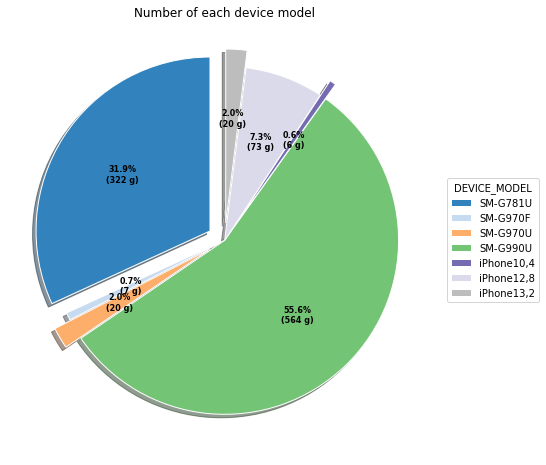

In [86]:
#Viewing the data

list_device_model = lightning_performance_simplified_group['DEVICE_MODEL'].tolist()
list_count = lightning_performance_simplified_group['COUNT'].tolist()

import numpy as np 
import matplotlib.pyplot as plt 

explode = (0.1, 0.0, 0.1, 0.0, 0.1, 0.0, 0.1) 
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(len(list_device_model))*3)
wp = { 'linewidth' : 1, 'edgecolor' : "white" } 
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n({:d} g)".format(pct, absolute)
fig, ax = plt.subplots(figsize =(12, 8))

wedges, texts, autotexts = ax.pie(list_count,  
                                  autopct = lambda pct: func(pct, list_count), 
                                  explode = explode,  
                                  shadow = True, 
                                  colors = outer_colors, 
                                  startangle = 90, 
                                  wedgeprops = wp, 
                                  textprops = dict(color ="black")) 

ax.legend(wedges, list_device_model, 
          title ="DEVICE_MODEL", 
          loc ="center left", 
          bbox_to_anchor =(1, 0, 0.5, 1)) 
  
plt.setp(autotexts, size = 8, weight ="bold") 
ax.set_title("Number of each device model") 
plt.show()